In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread("img2.png",cv2.IMREAD_GRAYSCALE)
gls=cv2.imread("img3.png",cv2.IMREAD_GRAYSCALE)
grp=cv2.imread("img1.png",cv2.IMREAD_GRAYSCALE)

In [3]:
size = (600,600)
imgr = cv2.resize(img, size)
glsr = cv2.resize(gls, size)
grpr= cv2.resize(grp, size)

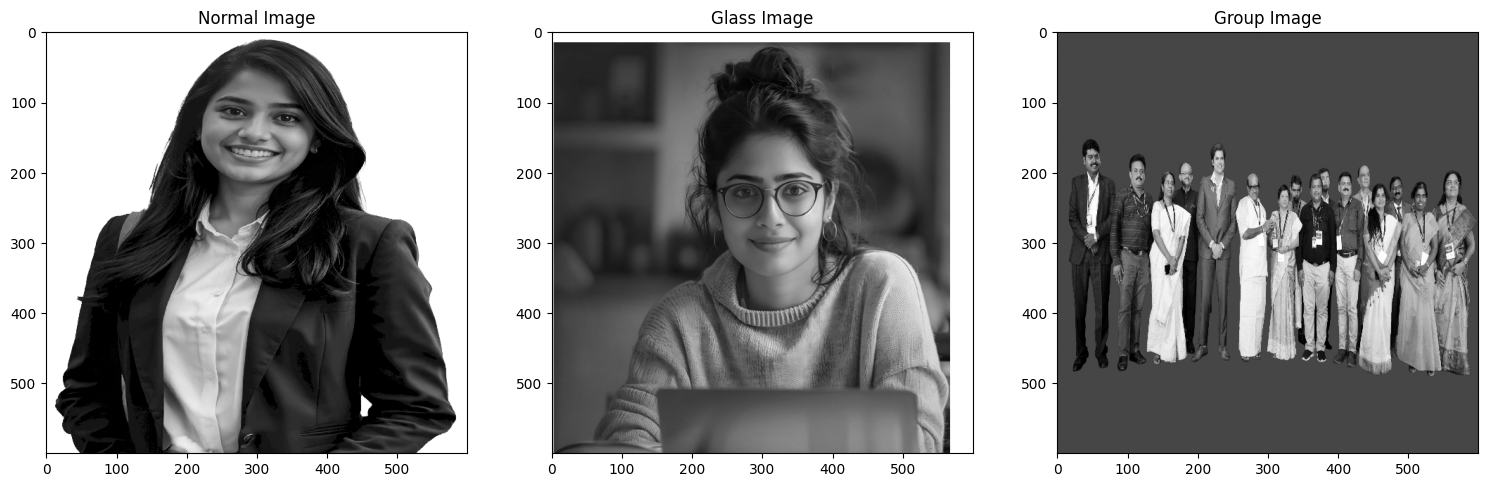

In [4]:
plt.figure(figsize=(25,20))
plt.subplot(142);plt.imshow(imgr,cmap='gray');plt.title("Normal Image")
plt.subplot(143);plt.imshow(glsr,cmap='gray');plt.title("Glass Image")
plt.subplot(144);plt.imshow(grpr,cmap='gray');plt.title("Group Image");
plt.show()

## Cascade files

openCV comes with these pre-trained cascade files.

### Face Cascade

In [5]:
face_cas=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
def detect(im):
    face=im.copy()
    rect=face_cas.detectMultiScale(face)

    for (x,y,w,h) in rect:
        cv2.rectangle(face,(x,y) , (x+w,y+h) , (127,0,255) , 10)
        cv2.imshow('Face Detection',face)
    return face

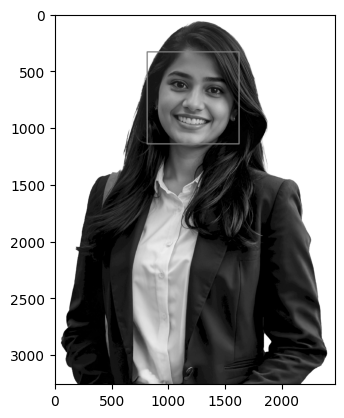

In [7]:
res_img=detect(img)
plt.imshow(res_img,cmap='gray')
plt.show()

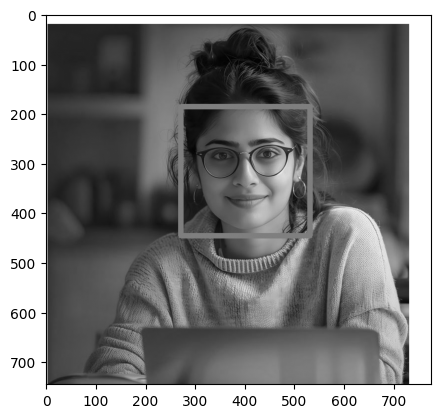

In [8]:
res_gls=detect(gls)
plt.imshow(res_gls,cmap='gray')
plt.show()

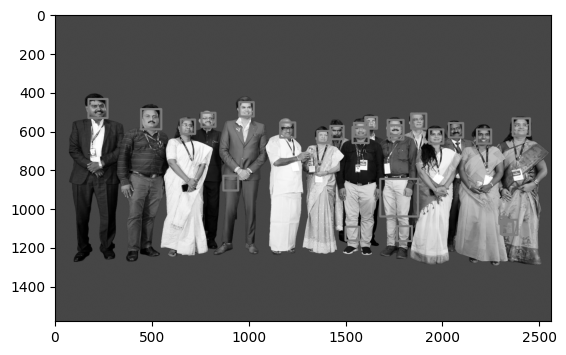

In [9]:
res_grp=detect(grp)
plt.imshow(res_grp,cmap='gray')
plt.show()

### Eye Cascade

In [10]:
eye_cas=cv2.CascadeClassifier('haarcascade_eye.xml')

In [11]:
def detect_eye(im):
    eye=im.copy()
    rect=eye_cas.detectMultiScale(eye)

    for (x,y,w,h) in rect:
        cv2.rectangle(eye,(x,y) , (x+w,y+h) , (255,255,255) , 10)
        cv2.imshow('Face Detection',eye)
    return eye

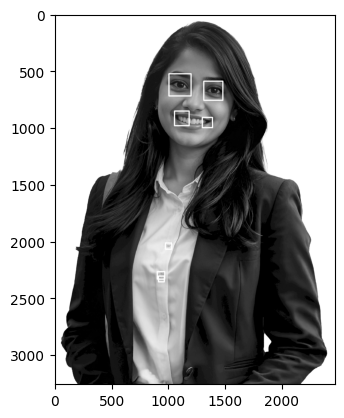

In [12]:
eye_img=detect_eye(img)
plt.imshow(eye_img,cmap='gray')
plt.show()

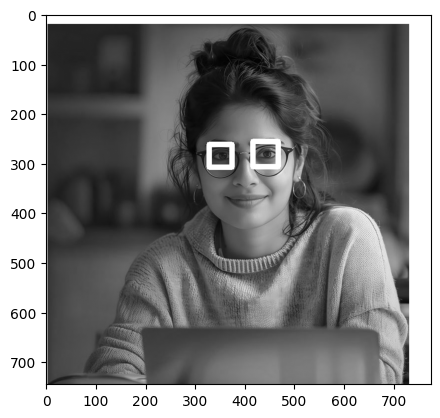

In [13]:
eye_img=detect_eye(gls)
plt.imshow(eye_img,cmap='gray')
plt.show()

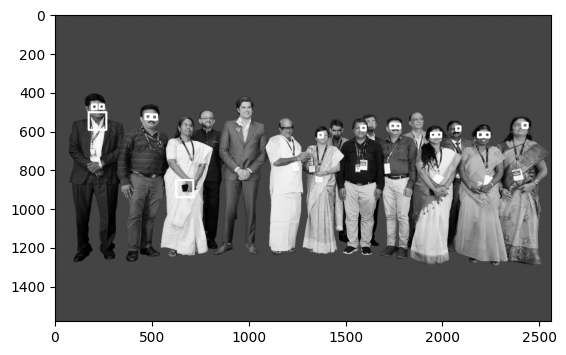

In [14]:
eye_img=detect_eye(grp)
plt.imshow(eye_img,cmap='gray')
plt.show()

## Real time video 

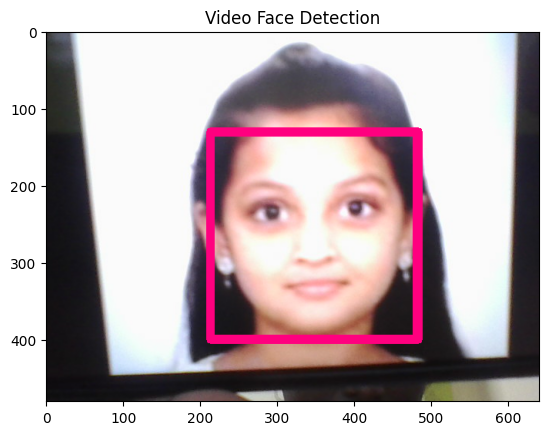

In [ ]:

cap=cv2.VideoCapture(0)

plt.ion()
fig,ax=plt.subplots()
rect,frame=cap.read(0)
frame=detect(frame)
im=ax.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.title('Video Face Detection')

while True:
    rect,frmae=cap.read(0)
    frame=detect(frame)

    im.set_data(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    plt.pause(0.10)

cap.relese()
plt.close()